<a href="https://colab.research.google.com/github/Dracovan/UTS_ML2019_ID13033360/blob/master/Assignment_2_Final_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2 - Practical Machine Learning Project

In [0]:
import torch
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.metrics import roc_auc_score
from keras import backend as K
from keras import layers as L
from keras.optimizers import Adam
from keras.models import Model
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.regularizers import l1_l2

In [0]:
#Helper function for time
def timer(f):
  start =time.time()
  res = f()
  end = time.time()
  print("fitting: {}.fomat(end -start)")
  return res

In [0]:
# Train and test Model
def build_model_for_data(data, target):
    X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=2)
    pipeline = make_pipeline(LinearRegression())
    model = timer(lambda: pipeline.fit(X_train, y_train))
    return (X_test, y_test, model)

In [0]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [0]:
import sys
print (sys.version)

3.6.8 (default, Jan 14 2019, 11:02:34) 
[GCC 8.0.1 20180414 (experimental) [trunk revision 259383]]


# GitHub Link

https://github.com/Dracovan/UTS_ML2019_ID13033360/blob/master/Assignment_2_Final.ipynb

# Introduction

Diabetes is a growing health issue with an increasing number of adults being inflicted with the disease. The problem that I want to tackle is identifying people with the disease as quickly as possible. This will allow for earlier treatment and preventative care to help them mitigate the negative effects of the disease. This is especially crucial as most of the negative effects of the disease can be mitigated and managed if caught early. 
The importance of this effort is the debilitating effects that diabetes has a person’s health. If left untreated it can lead to potential complications including nerve damage, kidney damage, heart disease and stroke. I will investigate whether machine learning could be useful in predicting the disease or if they have the disease without knowing it based on a series of common indicators that doctors can take.  


# Exploration

## Challenges 

There are several major challenges with this project limited data, missing values and results limited to Prima Indians in Phoenix Arizona. While the dataset might not be perfect it is indicative of what data is available in real world and as such is a valuable set to test models on. It demonstrates that if an algorithm is viable in this scenario it will be suitable for another real-world dataset that are just as imperfect. However, there are a few advantages with this kind of dataset, due to the sample being from one ethnic group from one region most of the factors that are not in the model like ethnicity, diet, healthcare availability and sex that could skew an individual’s results are less important because of the uniformity of the data gathered.


In [0]:
url = 'https://raw.githubusercontent.com/Dracovan/UTS_ML2019_ID13033360/master/diabetes_data.csv'
df1 = pd.read_csv(url)

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##Design / Plan Data Structures and Models
By looking at the data there are 768 data points with 8 attributes. These attributes are:

•	Pregnancies – Number of pregnancies

•	Glucose – Blood Glucose concentration

•	BloodPressure – Blood pressure 

•	SkinThickness – Thickness of triceps skin fold in mm

•	Insulin – Body’s Insulin levels

•	BMI – Weight divided by height squared

•	DiabetesPedigreeFuction – A function measuring genetic influence

•	Age - In years


In [0]:
df1.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [0]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


This shows the distribution of the dataset and its overall shape.

In [0]:
df1.isnull().values.any()

False

In [0]:
df1.shape

(768, 9)

## Data Visualisation

Here we use some boxplots to show the distribution of the data for each attribute and if there are any outliers in each of the columns.

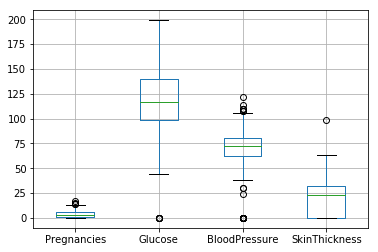

In [0]:
df1[['Pregnancies','Glucose','BloodPressure','SkinThickness']].boxplot()

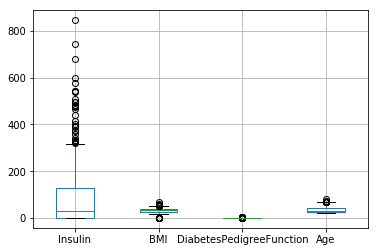

In [0]:
df1[['Insulin','BMI','DiabetesPedigreeFunction','Age']].boxplot()

Here we are grouping the different columns to by the 'Outcome' to see if their is any any obvious relationships.

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

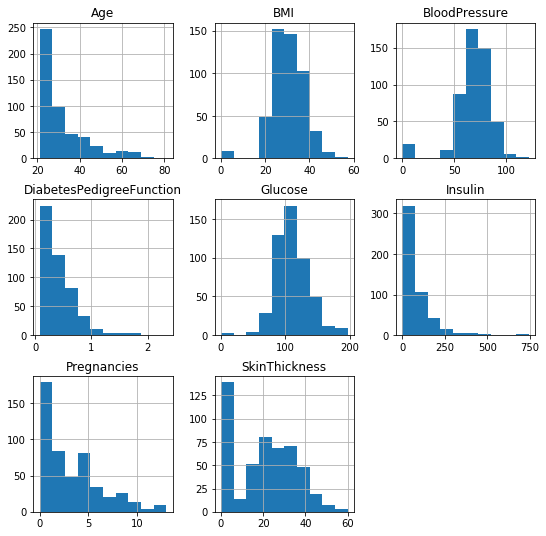

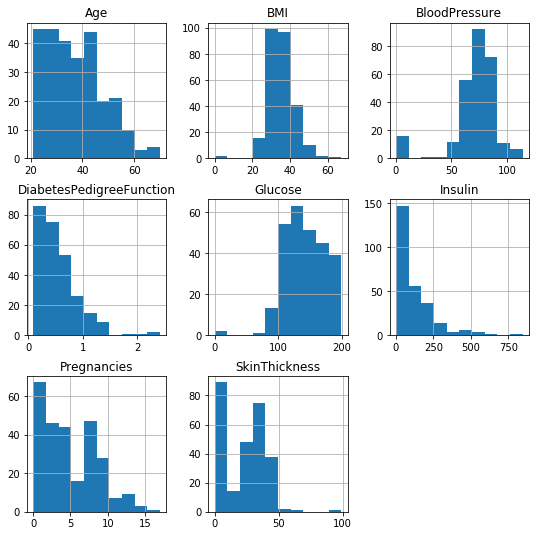

In [0]:
df1.groupby('Outcome').hist(figsize=(9,9))

Here we use a scatterplot matrix to see it there is any relationship between the different factors.

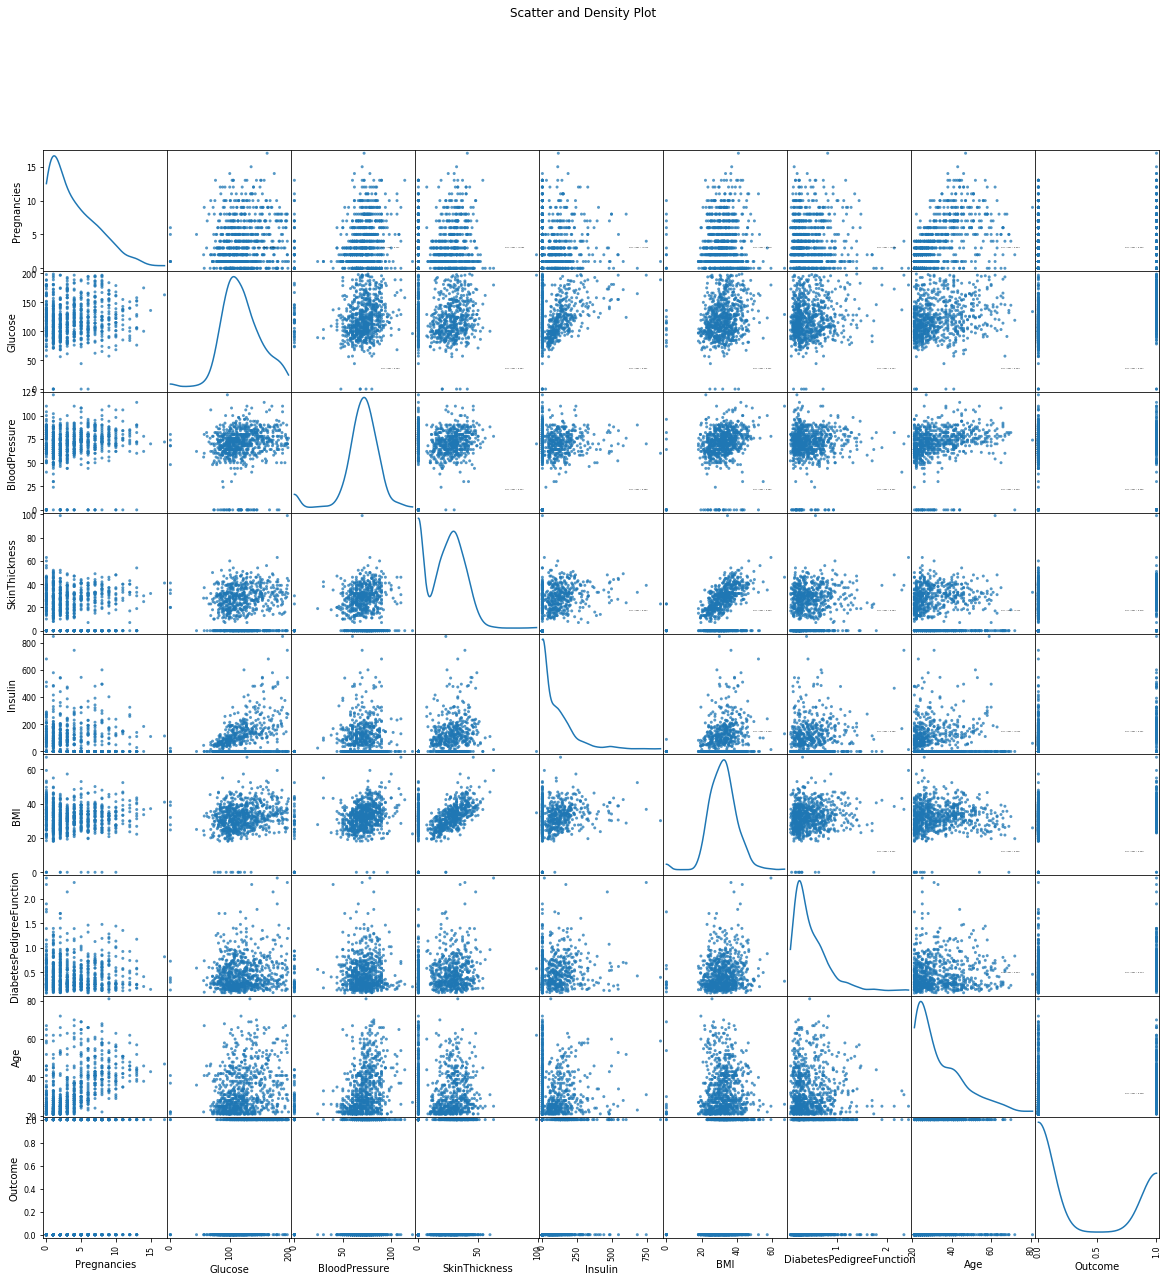

In [0]:


plotScatterMatrix(df1, 20, 2)



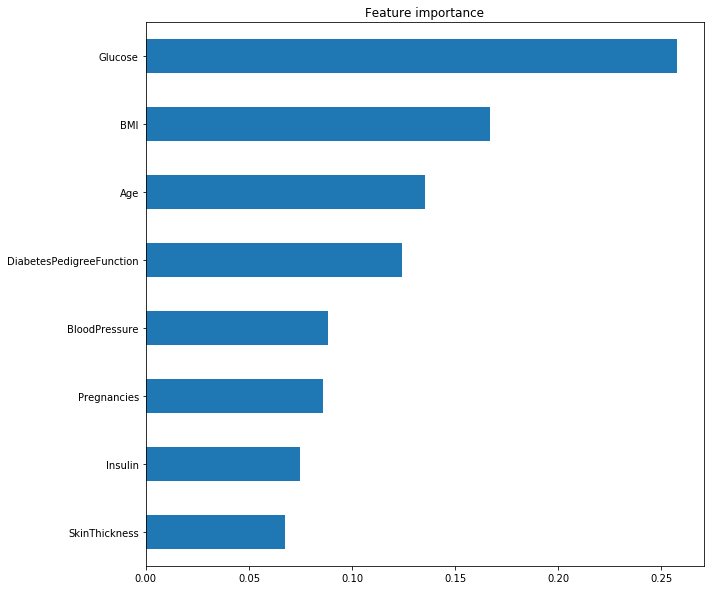

In [0]:
rf_clf = RandomForestClassifier(n_estimators = 200, max_depth=16)
rf_clf.fit(df1[df1.columns[:-1]], df1[df1.columns[-1]])
pd.Series(rf_clf.feature_importances_, index = df1.columns[:-1]).nlargest(12).plot(kind='barh',figsize=(10,10),title = 'Feature importance').invert_yaxis()

# Methodology

####Initial attempts to preprocess the data

In [0]:
x_array = np.array(df1['Age'])
np.array

<function numpy.array>

In [0]:
X_scaled = preprocessing.scale(df1)
X_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [0]:
 X_scaled.mean(axis=0)
  

array([-6.47630098e-17, -9.25185854e-18,  1.50342701e-17,  1.00613962e-16,
       -3.00685403e-17,  2.59052039e-16,  2.45174251e-16,  1.93132547e-16,
        7.40148683e-17])

##Normalisation of the data

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/Dracovan/UTS_ML2019_ID13033360/master/diabetes_data.csv')
scaler = MinMaxScaler()

y = data.pop('Outcome')
X = pd.DataFrame(scaler.fit_transform(data))

X_test = X[-80:]
y_test = y[-80:]

X = X.drop(X.index[-80:])
y = y.drop(y.index[-80:])

display(len(X))
display(X.head())

688

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


Split 
Target Class (y)
Input Features (x)

In [0]:
y = df1['Outcome']
x = df1.drop(['Outcome'], axis=1)

print ("df1 : ", df1.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

df1 :  (768, 9)
x :  (768, 8)
y :  (768,)


In [0]:
y=pd.get_dummies(y)
y.sample(7)

,0,1
443,0,1
448,0,1
619,0,1
84,0,1
648,0,1
227,0,1
731,0,1


Splitting the training testing and validation set

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(537, 8) (537, 2)
(231, 8) (231, 2)


In [0]:
#Making the model
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01,
                     solver='sgd', verbose=1,  random_state=121)

#### Training

In [0]:
#train our model
h=Model.fit(x_train,y_train)
#use our model to predict
y_pred=Model.predict(x_test)

Iteration 1, loss = inf
Iteration 2, loss = 3.33332150
Iteration 3, loss = 1.72714624
Iteration 4, loss = 1.46868058
Iteration 5, loss = 1.43607686
Iteration 6, loss = 1.41781191
Iteration 7, loss = 1.41565334
Iteration 8, loss = 1.41574322
Iteration 9, loss = 1.41469232
Iteration 10, loss = 1.41350103
Iteration 11, loss = 1.41209372
Iteration 12, loss = 1.41081268
Iteration 13, loss = 1.40946649
Iteration 14, loss = 1.40803935
Iteration 15, loss = 1.40664278
Iteration 16, loss = 1.40529302
Iteration 17, loss = 1.40391488
Iteration 18, loss = 1.40244197
Iteration 19, loss = 1.40121676
Iteration 20, loss = 1.39983948
Iteration 21, loss = 1.39862604
Iteration 22, loss = 1.39732088
Iteration 23, loss = 1.39606424
Iteration 24, loss = 1.39480039
Iteration 25, loss = 1.39354196
Iteration 26, loss = 1.39236447
Iteration 27, loss = 1.39124508
Iteration 28, loss = 1.39002141
Iteration 29, loss = 1.38890738
Iteration 30, loss = 1.38774811
Iteration 31, loss = 1.38659460
Iteration 32, loss = 1.3

# Evaluation

In [0]:
print(classification_report(y_test,y_pred)) # Print summary report
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix 
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

              precision    recall  f1-score   support

           0       0.69      1.00      0.82       159
           1       0.00      0.00      0.00        72

   micro avg       0.69      0.69      0.69       231
   macro avg       0.34      0.50      0.41       231
weighted avg       0.47      0.69      0.56       231
 samples avg       0.69      0.69      0.69       231

[[159   0]
 [ 72   0]]
accuracy is  0.6883116883116883


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


After training the model I evaluated I have printed a report, a confusion matrix and the accuracy. This however did provide a lower accuracy than Smith's 1988 report.

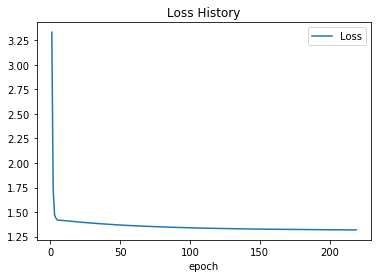

In [0]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

Above shows the reduction in loss as the model has been trained.

# Conclusion

In this report we looked at the Pima dataset and used the MLP neural network to train the model. It didn’t provide the strongest result, so more improvement is necessary. Possible improvements to that could be done to the project are potentially binning, testing other methodologies such as regression to compare to the results and possible an ensemble method like boosting with a second classifier to focus on the areas of the training data that the first classifier failed to predict. 

# Ethical


In undertaking this project there are some social and ethical problems that could become an issue. In this regard there are two main concerns with this project. The potential misuse of private health information and the chance that the program itself could be used to harm the patients. The issue with health information is that it is inherently personal and sensitive. The other issue is that the software will not be used for its intended purpose.

If we adopt the utilitarian model to explore the issues, we must ask ourselves does this project maximize the utility for most stakeholders (Mill 1895). That is if you weigh up the benefits of better detection of diabetes against the potential cost of health data and program misuse, is it a net positive. I believe so as the value of a human life is more than the value of their health records.
If we adopt the Kantian model to explore the issue, we must ask ourselves does this project conform to the moral law and do we have the right motive for making it (Kant 1895). That is, is this project moral and are the motives behind the project moral. If you look at it through the lens of a categorical imperative, would we want everyone to make this kind of software? The answer to this is yes as this kind of software could be help people deal with diabetes.

There are however several potential areas where this software could be misused. It could be used to infer other individual’s health status without their consent. It could be sold off to 3rd parties such as insurance companies or employment companies to discriminate against the individuals. By understanding these undesirable outcomes preventative measures could be used.


# Bibliography

Kant, I. 1895, 'Fundamental principles of the metaphysics of ethics.(T. Kingsmill Abbott, Trans.)', London: Longmans, Green and Co.

Mill, J.S. 1895, Utilitarianism, Longmans, Green and Company.

Smith, J.W., Everhart, J., Dickson, W., Knowler, W. & Johannes, R. 1988, 'Using the ADAP learning algorithm to forecast the onset of diabetes mellitus', Proceedings of the Annual Symposium on Computer Application in Medical Care, American Medical Informatics Association, p. 261.

